<a href="https://colab.research.google.com/github/juDEcorous/Potential-Datasets-for-Machine-Learning/blob/main/1_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Heart Disease Prediction**

Context:

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Data Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Target:

**The target for this data set to predict whether or not, patients would develope heart failure exacerbation using the risk factors of heart Disease.**

This will be a Classification Metrics.


## Data Dictionary

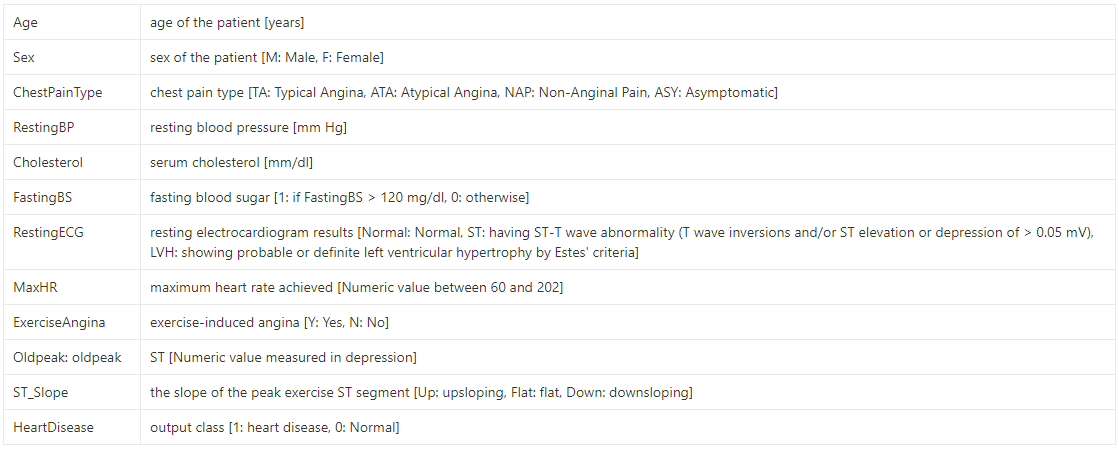




**The target for this data set to predict if patients would develope heart failure exacerbation using the risk factors of heart Disease.**

# Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Inspection

In [2]:
path = '/content/drive/MyDrive/Datas/project/heart.csv'

In [3]:
hf = pd.read_csv(path)
hf.info()
hf.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
451,64,M,ASY,144,0,0,ST,122,Y,1.0,Flat,1
849,62,M,NAP,130,231,0,Normal,146,N,1.8,Flat,0
414,54,M,ASY,130,0,1,Normal,110,Y,3.0,Flat,1
258,51,F,NAP,150,200,0,Normal,120,N,0.5,Up,0
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
805,54,M,ASY,140,239,0,Normal,160,N,1.2,Up,0
50,50,M,ASY,130,233,0,Normal,121,Y,2.0,Flat,1
111,57,M,ASY,150,255,0,Normal,92,Y,3.0,Flat,1
754,57,M,ASY,132,207,0,Normal,168,Y,0.0,Up,0


In [4]:
#Check and address duplicates
hf.duplicated().sum()

0

In [5]:
#Check and address missing values
hf.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [40]:
hf.HeartDisease.value_counts(normalize = True)*100

1    55.288986
0    44.711014
Name: HeartDisease, dtype: float64

We have an imbalance target in favour of Heart Disease, which means that our metrics can be misleading. The prediction will be more bias towards predicting Heart Disease.

## Numerical Columns

In [6]:
pd.set_option("display.max_rows", None)

In [7]:
data_types = hf.dtypes
int_data = data_types[(data_types == 'int')]

for column in int_data.index:
  print(column)
  print(f'Unique Values: {hf[column].unique()}\n')
  
float_data = data_types[(data_types == 'float')]

for column in float_data.index:
  print(column)
  print(f'Unique Values: {hf[column].unique()}\n')

Age
Unique Values: [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]

RestingBP
Unique Values: [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]

Cholesterol
Unique Values: [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 3

In [8]:
hf.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
hf.loc[hf.RestingBP == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [10]:
hf.loc[hf.Cholesterol == 0].sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
402,65,M,ASY,145,0,1,ST,67,N,0.7,Flat,1
368,57,M,ASY,140,0,0,Normal,120,Y,2.0,Flat,1
389,61,M,ASY,160,0,1,ST,145,N,1.0,Flat,1
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
320,59,M,NAP,125,0,1,Normal,175,N,2.6,Flat,1


- **Age Column** are within normal range.
- **RestingBP** have 200 value on it which TOO high but is not impossible as high BP (180/100 mmHG) are actually associated with heart attack, stroke or other life-threathening health problems. A resting BP of 0 is suspicious so we need to drop that sample, if this means that the patient is gone, I believe it is better if sample will not be included in our data set.
- Under the **Cholesterol** column, our 75th percentile value 267 and the max value is 603 which is about twice as many. Also, our minimum shows 0 which is suspicious and there are 172 samples with this value. While doing research, I noticed that the system of unit used was **mm/dL** and most of my sources used **mg/dL**. I am not sure if converting the units from mm/dL to mg/dL would be of any use. For this column we need to ask more details to the Medical Professionals or the one who gathers the data for more informations and  confirmation. But as for now, I will treat the value of meassurement as a typo.</br> 
sources: 
  * https://www.medicalnewstoday.com/articles/cholesterol-over-500#:~:text=Triglyceride%20levels%20over%20500%20mg,for%20heart%20disease%20and%20stroke
  * https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=167&contentid=lipid_panel_nonhdl#:~:text=Less%20than%2070%20milligrams%20per,159%20mg%2FdL%20%E2%80%93%20borderline%20high
- **FastingBS** column looks suspicious but it is under ordinal, in this case 1 are those patients who has has >120 mg/dL result on Fasting Blood Sugar, and 0 are those who have < 120 mg/dL  
- **MaxHR** column looks normal
- As for our **Oldpeak** column. 6.2 seems to be an impossible together with 5 and 5.6. However, this is possible - this ST depression happen when the coronoary artery blockage is extensive.
- **HeartDisease** column shows us weather a patient have heart disease or not

For now we are going to remove the impossible values (0) in RestingBP column.


In [11]:
hf.drop(449, inplace = True)

In [12]:
#checking if the row has been dropped
hf.loc[hf.RestingBP == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


## Categorical Column

In [13]:
obj_data = data_types[(data_types == 'object')]

for column in obj_data.index:
  print(column)
  print(f'Unique Values: {hf[column].unique()}\n')

Sex
Unique Values: ['M' 'F']

ChestPainType
Unique Values: ['ATA' 'NAP' 'ASY' 'TA']

RestingECG
Unique Values: ['Normal' 'ST' 'LVH']

ExerciseAngina
Unique Values: ['N' 'Y']

ST_Slope
Unique Values: ['Up' 'Flat' 'Down']



- We have no inconsistencies in our Categorical Column

## Exploratory Data Analysis

In [31]:
numerical_columns = list(hf.select_dtypes(include='number'))
categorical_columns = list(hf.select_dtypes(include='object'))

### Numerical EDA

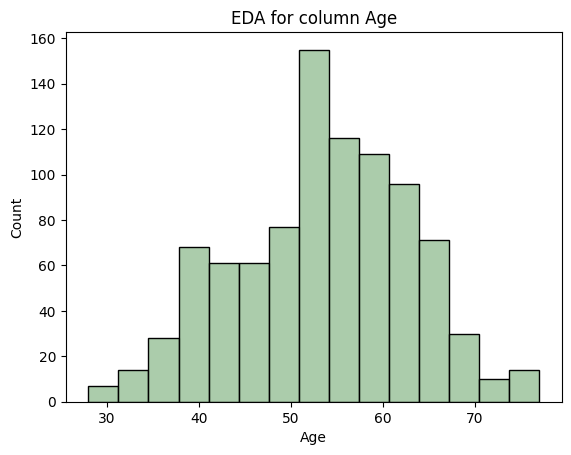

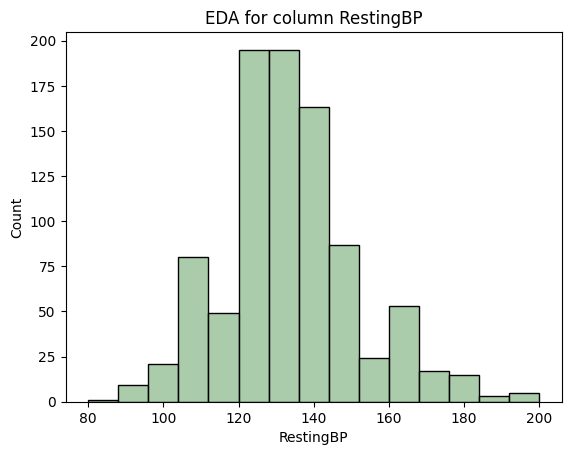

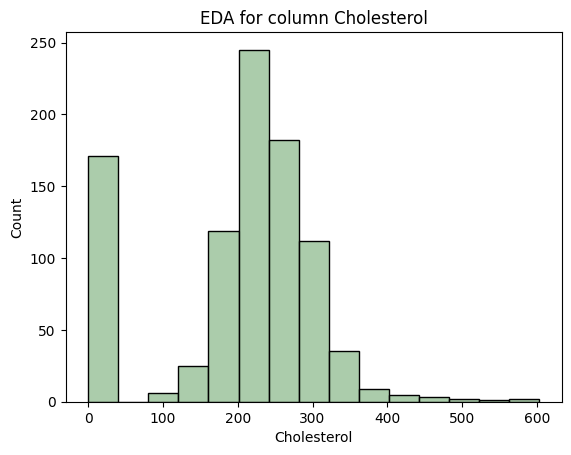

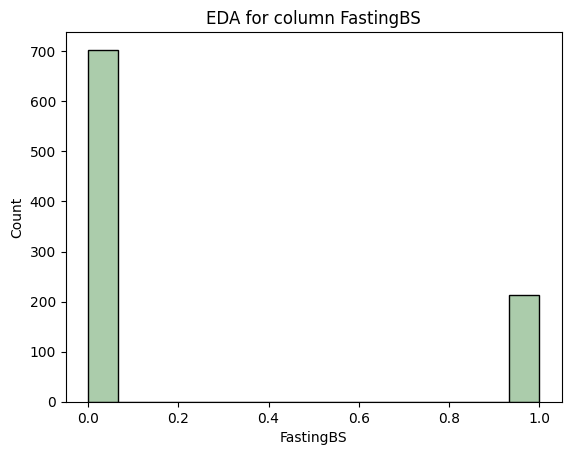

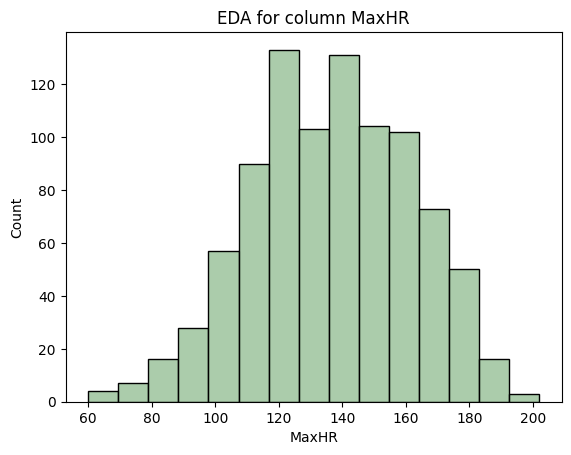

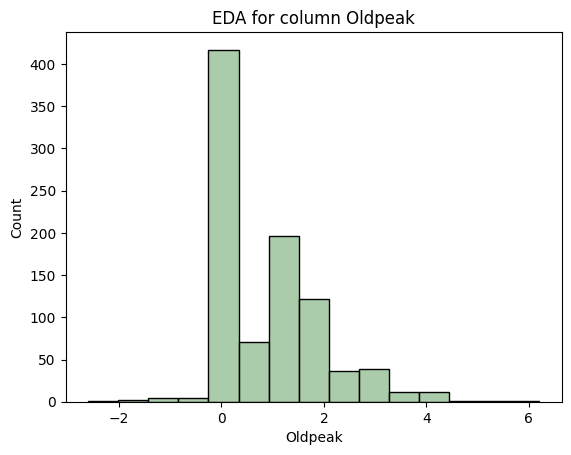

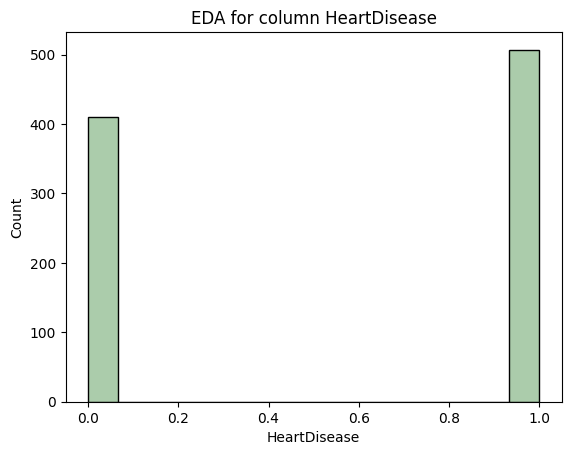

In [57]:
for column in numerical_columns:

  column_name = column
  
  plot = sns.histplot(data = hf, x = column, bins = 15, 
                      color='darkseagreen')
  plot.set_title('EDA for column ' + column_name)
  
  plt.show()

We can already see that our target column is imbalance.

### Categorical EDA

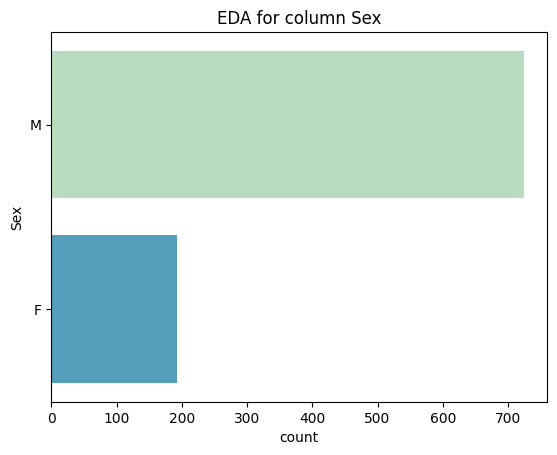

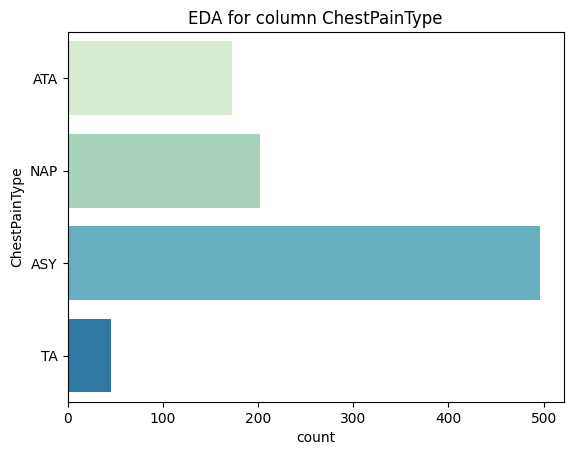

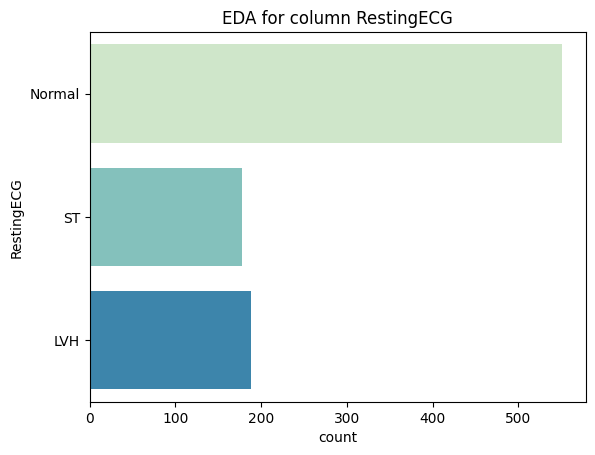

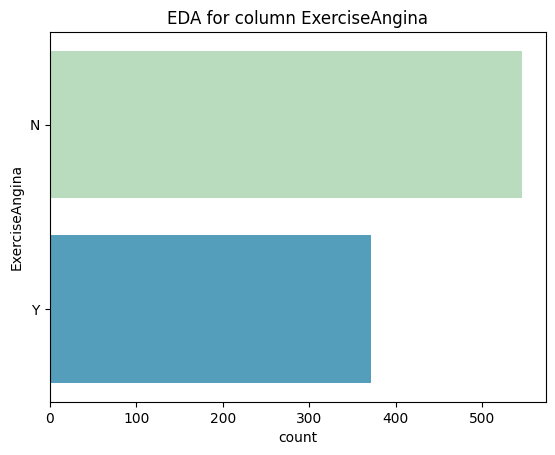

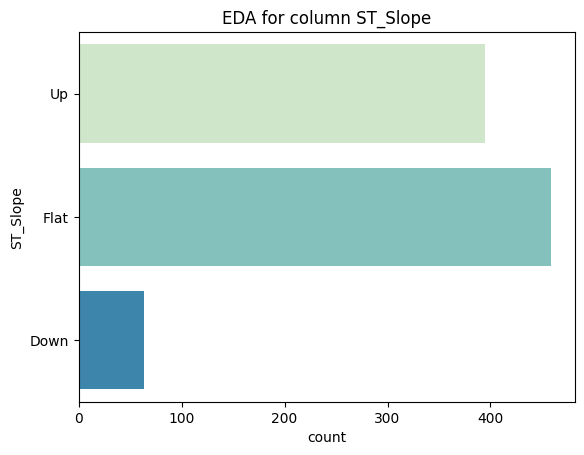

In [54]:
for column in categorical_columns:

  column_name = column
  
  plot = sns.countplot(data = hf, y = column, palette='GnBu')
  plot.set_title('EDA for column ' + column_name)
  
  plt.show()

  print('\n\n')

### Correlation Heatmap

<ipython-input-59-e80bb576ed29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = hf.corr()


<Axes: >

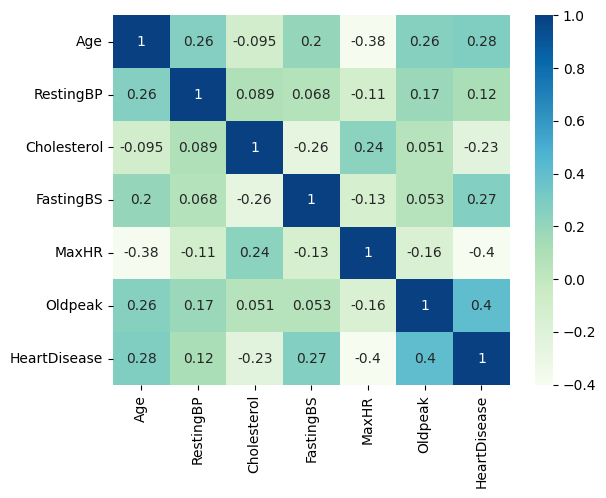

In [59]:
corr = hf.corr()
sns.heatmap(corr, annot = True, cmap = 'GnBu')

1. Our target doesn't have any strong or moderate correatoin with our Numerical Columns. However, a low correlation is seen between our target and columns MaxHR and Oldpeak.
2. Moderate correlation are seen on the following:
  - RestingBP and Fasting BS
  - OldPeak with Cholesterol and Fasting BS
3. High correlation is seen on Cholesterol and Resting BP

### Multivariate EDA

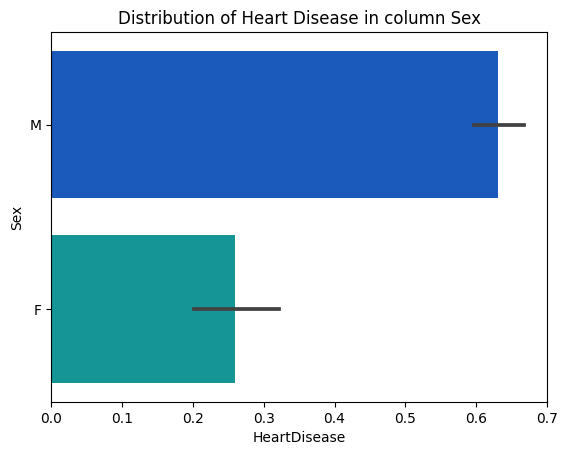

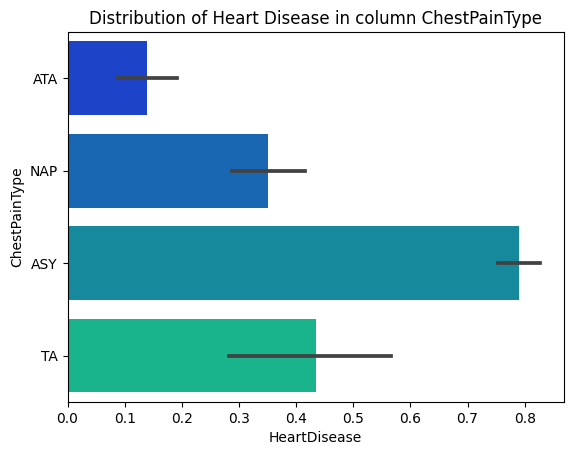

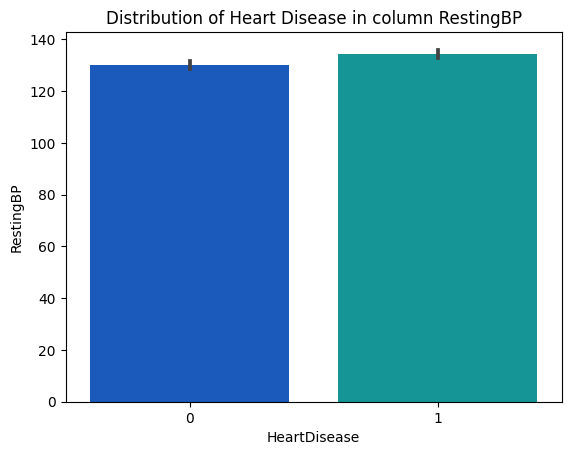

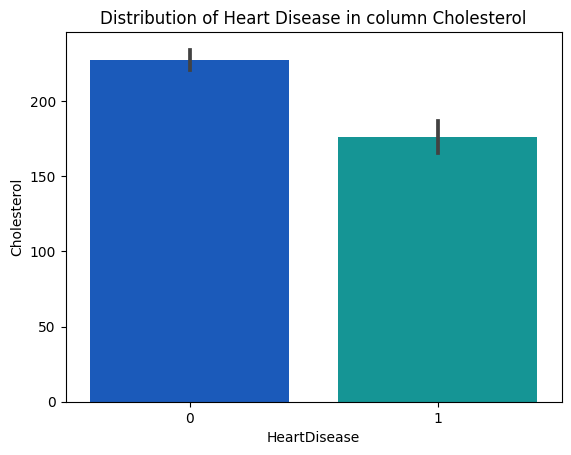

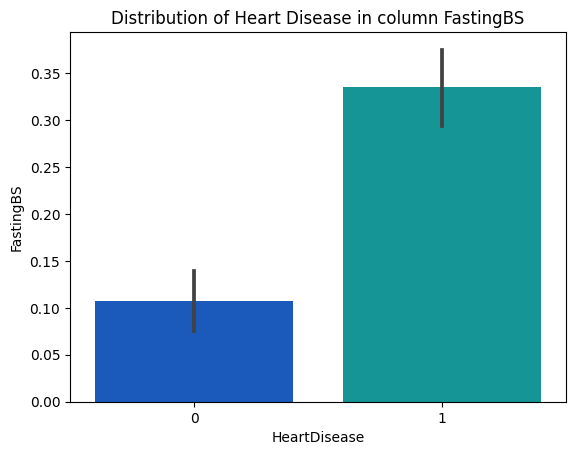

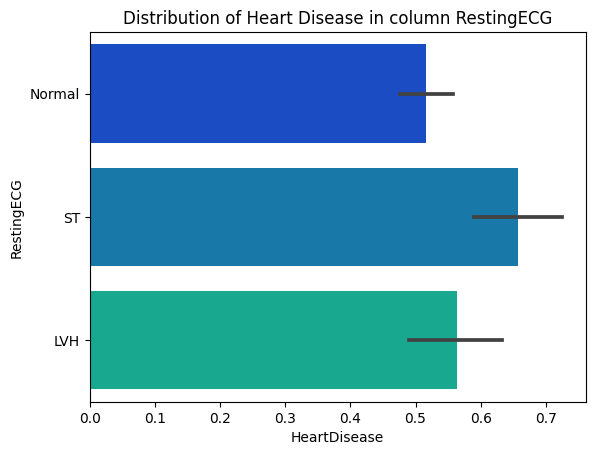

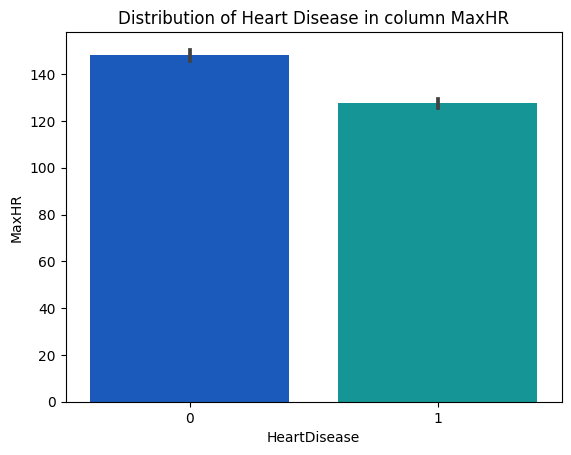

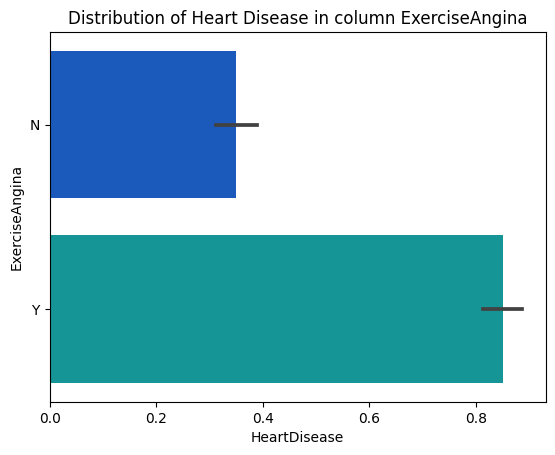

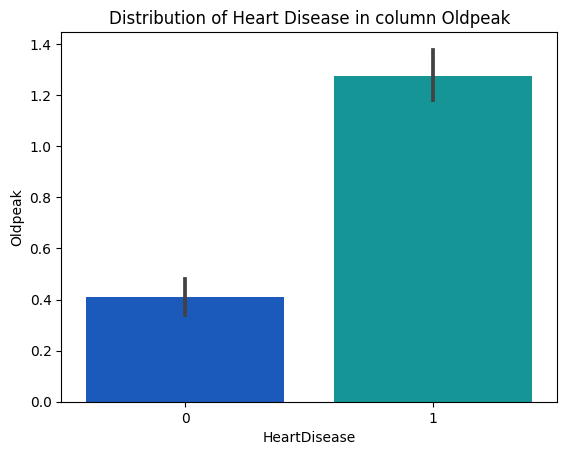

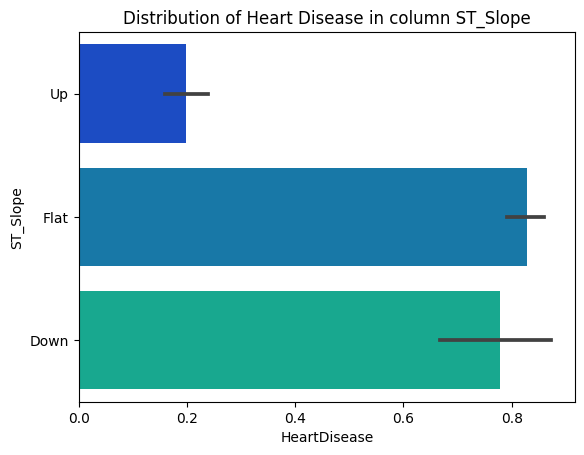

In [62]:
# removing HeartDisease column because that is our target
# Age is vast and wont be good desmonstration if using barplot
columns = list(hf.drop(columns = ['HeartDisease', 'Age']))

# Multivariate graph with Heart DSE and other categorical column
for column in columns:

  column_name = column
  
  plot = sns.barplot(data = hf, x = 'HeartDisease', y = column, 
                     palette = 'winter')
  plot.set_title('Distribution of Heart Disease in column ' + column_name)
  
  plt.show()

  print('\n\n')